In [1]:
#import libraries
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# K-Means implimantation and Visualisation

Δώσε την πρώτη διάσταση του πίνακα (από 0 έως 3): 2
Δώσε τη δεύτερη διάσταση του πίνακα (από 0 έως 3 εκτός της 2): 3
Δώσε τον αριθμό των συστάδων(από 2 εώς 150): 3


C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


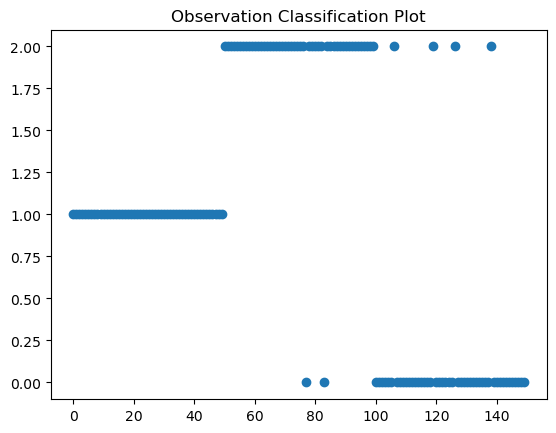

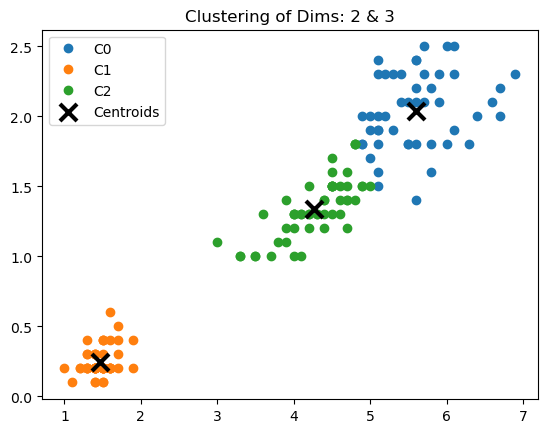

SSE =  31.371358974358976
SC =  0.6604800083974887


In [2]:
#Iris Dataset
meas = load_iris().data

numberOfRows, numberOfColumns = meas.shape

#Dataset dimensions selection
Dim1 = int(input(f"Δώσε την πρώτη διάσταση του πίνακα (από 0 έως {numberOfColumns-1}): "))
Dim2 = int(input(f"Δώσε τη δεύτερη διάσταση του πίνακα (από 0 έως {numberOfColumns-1} εκτός της {Dim1}): "))
X = meas[:,[Dim1,Dim2]]

#Number of clusters
k = int(input(f"Δώσε τον αριθμό των συστάδων(από 2 εώς {numberOfRows}): "))

##Implementation of KMeans clustering
kmeans = KMeans(n_clusters=k).fit(X)
IDX = kmeans.labels_
C = kmeans.cluster_centers_

#Visualisation of class of each observation
plt.figure(1)
plt.plot(IDX[:], 'o')
plt.title('Observation Classification Plot')
plt.show()
              
#Clustering plot              
for i in range(k):
    plt.plot(X[IDX==i][:,0],X[IDX==i][:,1], marker='o', linewidth=0, label='C%d'%i)

title = ' '.join(str(a)for a in ['Clustering of Dims:',Dim1, '&', Dim2])
plt.scatter(C[:,0], C[:,1], marker='x', color='black', s=150, linewidth=3, label='Centroids', zorder=10)
plt.title(title)
plt.legend()
plt.show()

#Print SSE & SC
print('SSE = ', kmeans.inertia_)
print('SC = ', metrics.silhouette_score(X, IDX))

# Create K-SSE & K-Silhouette Coefficient plots

Δώσε την πρώτη διάσταση του πίνακα (από 0 έως 3): 2
Δώσε τη δεύτερη διάσταση του πίνακα (από 0 έως 3 εκτός της 2): 3


C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anast\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

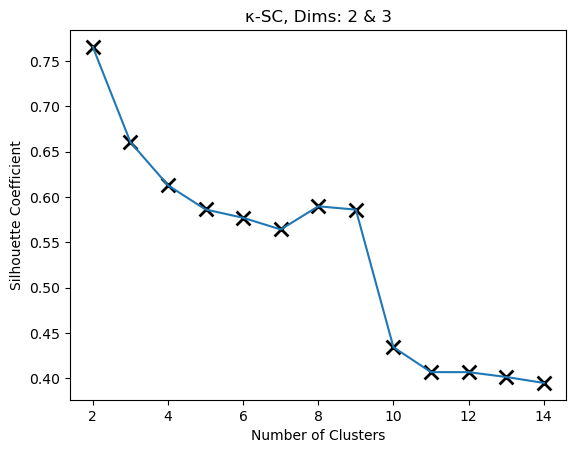

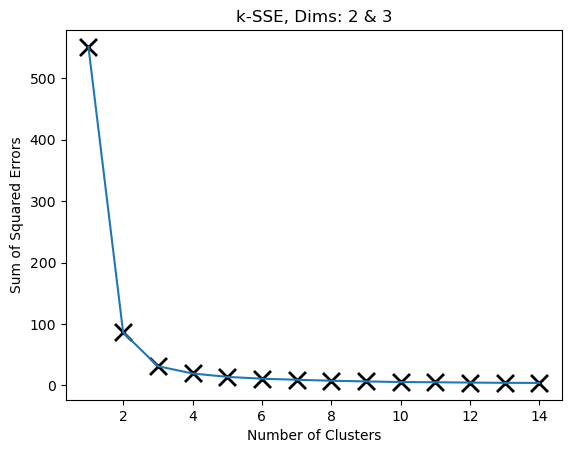

In [3]:
#Iris Dataset
meas = load_iris().data

#Dataset dimensions selection
Dim1 = int(input(f"Δώσε την πρώτη διάσταση του πίνακα (από 0 έως {numberOfColumns-1}): "))
Dim2 = int(input(f"Δώσε τη δεύτερη διάσταση του πίνακα (από 0 έως {numberOfColumns-1} εκτός της {Dim1}): "))
X = meas[:,[Dim1,Dim2]]

#Initialize sum of squared errors and silhouette coefficient lists
sse = []
sc = []

#Clusters that will be used to create the "elbow" diagram
clusters = range(1,15)

#Implementation of KMeans clustering for above range
#Calculation of SSE and SC for each clustering
for k in clusters:
    kmeans = KMeans(k, n_init=10).fit(X)
    IDX = kmeans.labels_
    C = kmeans.cluster_centers_
    sse.append(kmeans.inertia_)
    #Avoid error, silhoutte_score can't be used for 1 cluster
    if k>1:
        sc.append(metrics.silhouette_score(X, IDX))
        
    
#k-SC plot
title_sc = ' '.join(str(a)for a in ['κ-SC, Dims:',Dim1, '&', Dim2])
plt.plot(clusters[1:],sc)
plt.scatter(clusters[1:], sc, marker='x', color='black', s=100, linewidth=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette Coefficient') 
plt.title(title_sc)
plt.show()
    
#k-SSE plot
title_sse = ' '.join(str(a)for a in ['k-SSE, Dims:',Dim1, '&', Dim2])
plt.plot(clusters, sse)
plt.scatter(clusters, sse, marker='x', color='black', s=150, linewidth=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title(title_sse)
plt.show()